# QUESTION 4

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [18]:
car_sales_data = pd.read_excel('C:/Users/vadla/Downloads/Simplified Car Sales Data.xlsx')
car_sales_data.head()

Make     CountryName  SalePrice  CostPrice  LaborCost  \
0   Rolls Royce  United Kingdom      95000      50000        750   
1  Aston Martin  United Kingdom     120000      75000        550   
2   Rolls Royce  United Kingdom      88000      75000        550   
3   Rolls Royce  United Kingdom      89000      88000        550   
4   Rolls Royce  United Kingdom      92000      62000        550   

           Color  
0            Red  
1           Blue  
2          Green  
3           Blue  
4  Canary Yellow

In [19]:
# Print the column names to verify the correct ones
print(car_sales_data.columns)

Index(['Make', 'CountryName', 'SalePrice', 'CostPrice', 'LaborCost', 'Color'], dtype='object')


In [20]:
# Display unique country names to check for naming inconsistencies
unique_countries = car_sales_data['CountryName'].unique()
print(unique_countries)


['United Kingdom' 'France' 'USA' 'Switzerland' 'Spain' 'Germany']


Total Sales and Costs by Country:
      CountryName  TotalSales  TotalCosts
0          France     2524510     1496571
4             USA    11653960     7829200
5  United Kingdom    15725000    10323832


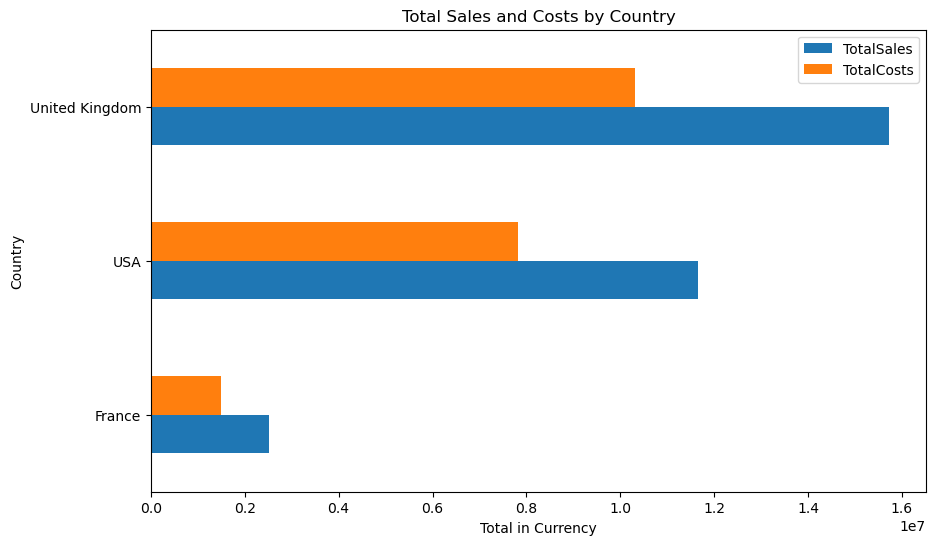

In [21]:
# Since there is no UnitsSold column, we will assume each row represents one sale
# Calculate Total Sales and Total Costs for each entry
car_sales_data['TotalSales'] = car_sales_data['SalePrice']
car_sales_data['TotalCosts'] = car_sales_data['CostPrice'] + car_sales_data['LaborCost']

# Group by CountryName, aggregate TotalSales and TotalCosts
grouped_data = car_sales_data.groupby(['CountryName']).agg({'TotalSales': 'sum', 'TotalCosts': 'sum'}).reset_index()

# Filter for the United Kingdom, the United States, and France
selected_countries_data = grouped_data[grouped_data['CountryName'].isin(['United Kingdom', 'USA', 'France'])]

# Display the total sales and total costs for the selected countries
print("Total Sales and Costs by Country:")
print(selected_countries_data)

# Plotting the horizontal bar chart for total sales and total costs for the selected countries
selected_countries_data.set_index('CountryName').plot(kind='barh', figsize=(10, 6))
plt.title('Total Sales and Costs by Country')
plt.xlabel('Total in Currency')
plt.ylabel('Country')
plt.show()

